In [15]:
import functools
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

import lmfit
from lmfit import Parameter, Parameters 

from sivqed.models.cavity import Cavity, MultiQubitCavity
import sivqed.models.fitter as fitter
from sivqed.models.fitter import single_siv_ref_model, two_siv_ref_model

plt.rcParams['font.size'] = 18

In [16]:
def not_in_range(arr, ranges):
    """ Returns indices of `arr` that do not lie in the list 
        of (start, end) tuples in ranges. """
    
    conditions = []
    # AND of (x < start OR x > end) leads to all x that are 
    # outside of the (start, end) ranges.
    for start, end in ranges:
        conditions.append((arr < start) | (arr > end)) 
    return np.where(functools.reduce(np.logical_and, conditions))

# Fitting empty cavity + 1 SiV

Text(0.5, 1.0, 'Filtered cavity spectrum')

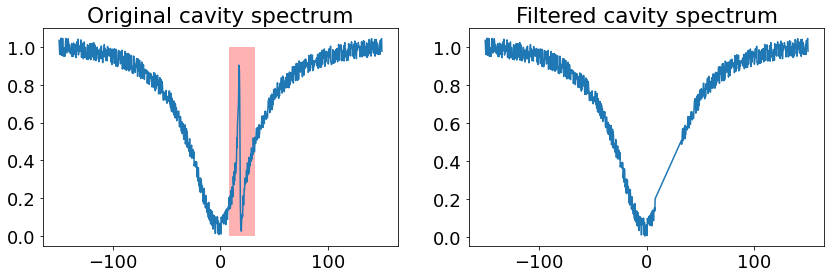

In [30]:
# Cavity with 1 SiV
w_arr = np.linspace(-150, 150, 1000)
c = Cavity()
# Generate data with noise
data = c.reflectance(w_arr, 1) + np.random.random(len(w_arr)) * 0.1 

# Range of frequencies to filter out to remove SiV peaks
filter_range = [(8, 32)]

# Filter the freq and intensity values
filtered_indices = not_in_range(w_arr, filter_range)
w_arr_filtered = w_arr[filtered_indices]
data_filtered = data[filtered_indices]

# Plot original and filtered cavity
fig, ax = plt.subplots(figsize=[14, 4], ncols=2)
ax[0].plot(w_arr, data)
ax[0].set_title("Original cavity spectrum")
for start, end in filter_range:
    ax[0].add_patch(patches.Rectangle((start, 0), (end-start), 1.0, facecolor='red', alpha=0.3))

ax[1].plot(w_arr_filtered, data_filtered)
ax[1].set_title("Filtered cavity spectrum")

## Fit empty cavity

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 139
    # data points      = 1000
    # variables        = 8
    chi-square         = 0.86080859
    reduced chi-square = 8.6775e-04
    Akaike info crit   = -7041.63839
    Bayesian info crit = -7002.37635
[[Variables]]
    w_up:      17.5410419 +/- 0.02844835 (0.16%) (init = 30)
    g_up:      5.69337754 +/- 0.07636975 (1.34%) (init = 1)
    gamma_up:  0.10404749 +/- 0.02293034 (22.04%) (init = 1)
    w_c:      -0.08289393 +/- 0.10826454 (130.61%) (init = 1)
    k_in:      18.4098061 +/- 2.49079972 (13.53%) (init = 15)
    k_tot:     32.8453911 +/- 0.22506883 (0.69%) (init = 30)
    A:         1.00867682 +/- 0.03639014 (3.61%) (init = 1)
    B:         0.03826164 +/- 0.03638434 (95.09%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(A, B)            = -0.999
    C(k_in, A)         =  0.993
    C(k_in, B)         = -0.991
    C(gamma_up, k_in)  = -0.847
    C(gamma_up, A)     = -0.845

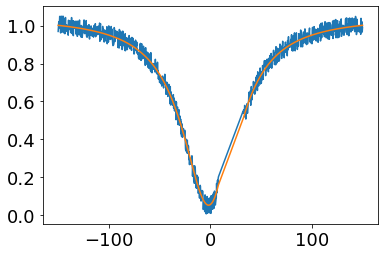

In [29]:
params = Parameters()
params.add_many(
    Parameter('w_up', value=30, min=-np.inf, max=np.inf),
    Parameter('g_up', value=1, min=0, max=np.inf),
    Parameter('gamma_up', value=1, min=0, max=np.inf),
    Parameter('w_c', value=1, min=-np.inf, max=np.inf),
    Parameter('k_in', value=15, min=0, max=np.inf),
    Parameter('k_tot', value=30, min=0, max=np.inf),
    Parameter('A', value=1, min=0, max=np.inf),
    Parameter('B', value=0, min=-np.inf, max=np.inf),
)

results = single_siv_ref_model.fit(data, params, w=w_arr)
lmfit.report_fit(results)

plt.plot(w_arr_filtered, data_filtered)
plt.plot(w_arr_filtered, single_siv_ref_model.eval(results.params, w=w_arr_filtered))

## Fit SiV in cavity

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 215
    # data points      = 1000
    # variables        = 8
    chi-square         = 0.87287592
    reduced chi-square = 8.7992e-04
    Akaike info crit   = -7027.71714
    Bayesian info crit = -6988.45510
[[Variables]]
    w_up:      17.5189497 +/- 0.02902024 (0.17%) (init = 30)
    g_up:      5.72631104 +/- 0.07772550 (1.36%) (init = 1)
    gamma_up:  0.10895724 +/- 0.02351537 (21.58%) (init = 1)
    w_c:      -0.01059731 +/- 0.10952376 (1033.51%) (init = 1)
    k_in:      18.4190004 +/- 2.47615542 (13.44%) (init = 15)
    k_tot:     33.0695040 +/- 0.22840027 (0.69%) (init = 30)
    A:         1.00612123 +/- 0.03361799 (3.34%) (init = 1)
    B:         0.04082223 +/- 0.03361199 (82.34%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(A, B)            = -0.998
    C(k_in, A)         =  0.992
    C(k_in, B)         = -0.990
    C(gamma_up, k_in)  = -0.844
    C(gamma_up, A)     = -0.84

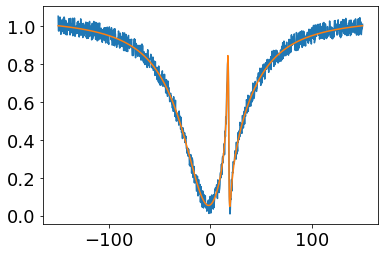

In [21]:
params = Parameters()
params.add_many(
    Parameter('w_up', value=30, min=-np.inf, max=np.inf),
    Parameter('g_up', value=1, min=0, max=np.inf),
    Parameter('gamma_up', value=1, min=0, max=np.inf),
    Parameter('w_c', value=1, min=-np.inf, max=np.inf),
    Parameter('k_in', value=15, min=0, max=np.inf),
    Parameter('k_tot', value=30, min=0, max=np.inf),
    Parameter('A', value=1, min=0, max=np.inf),
    Parameter('B', value=0, min=-np.inf, max=np.inf),
)

results = single_siv_ref_model.fit(data, params, w=w_arr)
lmfit.report_fit(results)

plt.plot(w_arr, data)
plt.plot(w_arr, single_siv_ref_model.eval(results.params, w=w_arr))

# Fitting multiple SiVs

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 370
    # data points      = 1000
    # variables        = 11
    chi-square         = 0.82414049
    reduced chi-square = 8.3331e-04
    Akaike info crit   = -7079.16954
    Bayesian info crit = -7025.18423
[[Variables]]
    w_up_1:      17.5240293 +/- 0.02480652 (0.14%) (init = 30)
    g_up_1:      5.65362042 +/- 0.06789326 (1.20%) (init = 1)
    gamma_up_1:  0.10541086 +/- 0.01967360 (18.66%) (init = 1)
    w_up_2:      150.043189 +/- 0.03373114 (0.02%) (init = 148)
    g_up_2:      5.62829893 +/- 0.42685702 (7.58%) (init = 1)
    gamma_up_2:  0.06550447 +/- 0.02857429 (43.62%) (init = 1)
    w_c:        -0.12128716 +/- 0.10789294 (88.96%) (init = 1)
    k_in:        17.8285172 +/- 2.22134312 (12.46%) (init = 15)
    k_tot:       33.2292261 +/- 0.19931357 (0.60%) (init = 30)
    A:           1.00517332 +/- 0.01896364 (1.89%) (init = 1)
    B:           0.04585325 +/- 0.01895834 (41.35%) (init = 0)
[[Correla

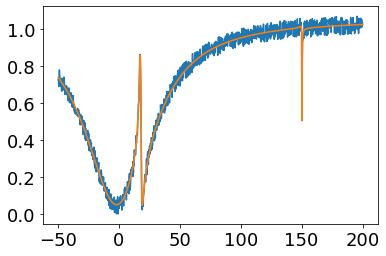

In [36]:
m = MultiQubitCavity(None, [{}, {"w_up": 150}])
w_arr = np.linspace(-50, 200, 1000)
data = m.reflectance(w_arr, 1) + np.random.random(len(w_arr)) * 0.1
plt.plot(w_arr, data)

params = Parameters()
params.add_many(
    Parameter('w_up_1', value=30, min=-np.inf, max=np.inf),
    Parameter('g_up_1', value=1, min=0, max=np.inf),
    Parameter('gamma_up_1', value=1, min=0, max=np.inf),
    Parameter('w_up_2', value=148, min=-np.inf, max=np.inf),
    Parameter('g_up_2', value=1, min=0, max=np.inf),
    Parameter('gamma_up_2', value=1, min=0, max=np.inf),
    Parameter('w_c', value=1, min=-np.inf, max=np.inf),
    Parameter('k_in', value=15, min=0, max=np.inf),
    Parameter('k_tot', value=30, min=0, max=np.inf),
    Parameter('A', value=1, min=0, max=np.inf),
    Parameter('B', value=0, min=-np.inf, max=np.inf),
)

results = two_siv_ref_model.fit(data, params, w=w_arr)
lmfit.report_fit(results)

plt.plot(w_arr, two_siv_ref_model.eval(results.params, w=w_arr))